# Week 1 Stationarity and Random Walk
## Time Series Analysis 
###  Earnest Salgado
### ID 12285784

In [1]:
import math
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

## Question 1 Stationarity

### 1A - 10 pts Task: Perform EDA on the dataset. Include both quantitative and qualitative descriptions. Check for missing data and correlations.

- We can observe that there are 4 attributes and 4972 rows.
- We check for missing values - there seems to be zero!
- Since there are no heat 'areas' appearing in our heatmap, we confirm there are no missing (null values) in our data
- We then use the visualization to get insights on the data we can observe by these numerical values that there is strong positive correlation with all of these stocks. 
- There is autocorrelations present in our data for each stock! And we know in the presence of auto-correlation, there is seasonality present in our data. Based on the plots we generate, there seems to be perfect correlation going on, because every point is significant and going past the critical region of +/- 1.96*sqroot(n).
- Autocorrelations also means to say non-stationarity.

In [2]:
df = pd.read_csv('hw1_data.csv')
df

,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491
...,...,...,...,...
4967,2020-02-26,152.328430,215.254486,305.789459
4968,2020-02-27,146.964890,204.475845,292.055939
4969,2020-02-28,144.273254,204.634949,290.828827
4970,2020-03-02,148.907211,215.194824,303.423584


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4972 non-null   object 
 1   IWM     4972 non-null   float64
 2   QQQ     4972 non-null   float64
 3   SPY     4972 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.5+ KB


In [4]:
df.isnull().sum()

Date    0
IWM     0
QQQ     0
SPY     0
dtype: int64

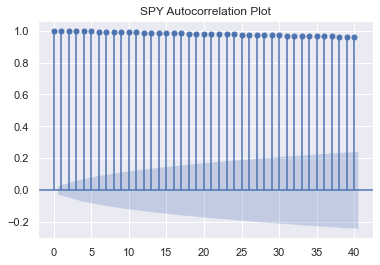

In [5]:
p = plot_acf(df['SPY'], lags=40, title='SPY Autocorrelation Plot')

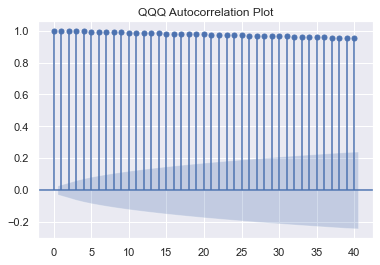

In [6]:
p = plot_acf(df['QQQ'], lags=40, title='QQQ Autocorrelation Plot')

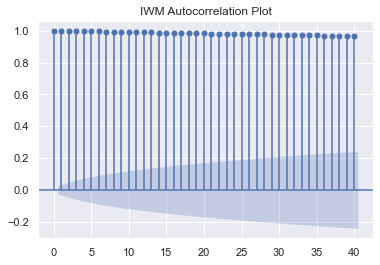

In [7]:
p = plot_acf(df['IWM'], lags=40, title='IWM Autocorrelation Plot')

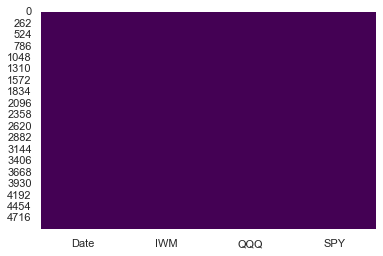

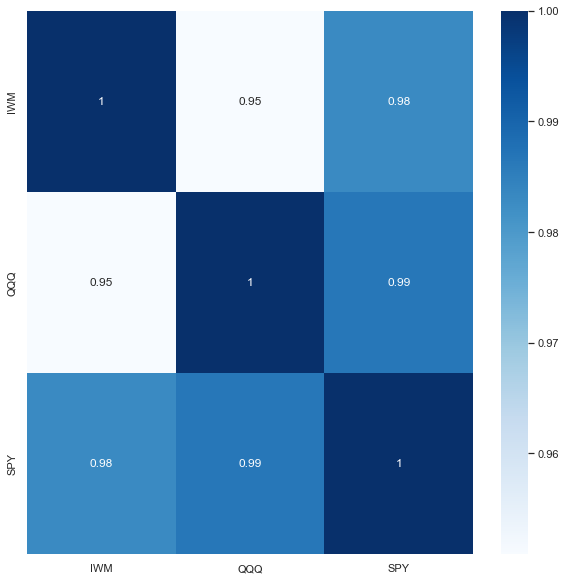

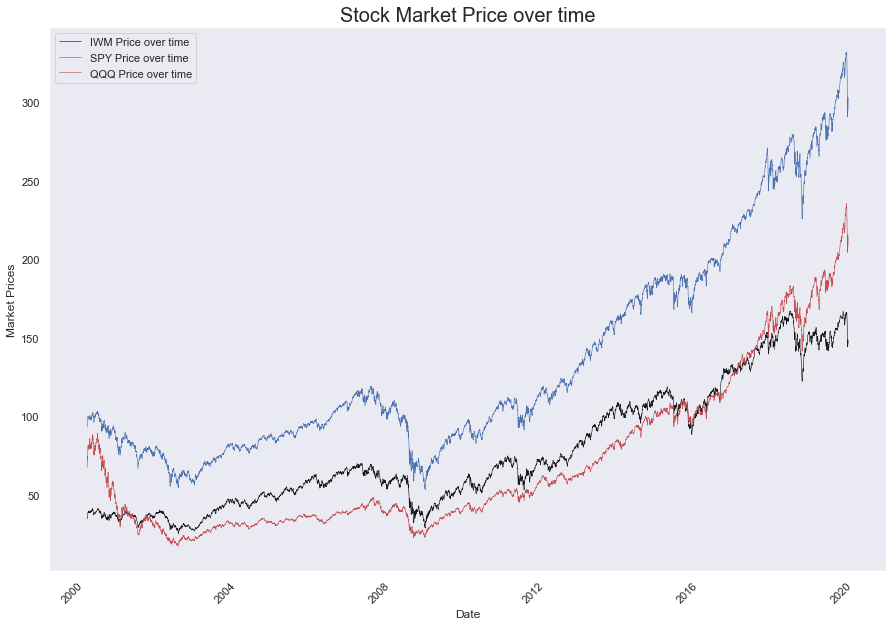

In [8]:
# 1A continued

# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Asking Analytical Questions and Visualizations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

x = df['Date']
x = pd.to_datetime(x)

y = df['IWM']
z = df['SPY']
v = df['QQQ']

plt.figure(figsize=(15,10))  
plt.plot(x, y, color = 'k',label = "IWM Price over time", ls = '-', lw = 0.6)
plt.plot(x, z, color = 'b',label = "SPY Price over time", ls = '-', lw = 0.6)
plt.plot(x, v, color = 'r',label = "QQQ Price over time", ls = '-', lw = 0.6)

plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Market Prices')
plt.title('Stock Market Price over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

### 1B - 5 pts Concept: Describe the data. Do you expect this data to be stationary? Do you expect this data to be a random walk?

- We define stationarity as data which its mean/variance does not change (it is constant)! The slope of the line would not change. However, we observe that for each of the stocks, its mean and variance increases over time. For example, mean for each stock is higher in 2016 than in 2004. Thus I do not expect this data to be stationary.

- The importance of stationarity is that we can create a model based on the 'stationary' characteristics of the data. If this notion held in the case of the stock market, everyone would be able to predict what the market will do based on their models and make trillions of money. 

- There does seem to be some randomness in the values, defined by some probability distribution

- If you have no background in topics such as technical and fundamental analysis, you could propose that the random walk theory can be shown through the unpredictable movements of stock prices, and there are no patterns that an investor can leverage to experience gains. 

### 1C - 10 pts Task: Create a function that returns the stationarity test results from both ADF and KPSS tests

In [9]:
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy

def adf_test(timeseries):
    print ('Dickey-Fuller Test Result:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('KPSS Test Result:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

### 1D - 5 pts Task: Use the function to test if each series is stationary. Return results from both ADF and KPSS tests for all three time series

- ADF tests are showing that the p-values are greater than 0.05 so the Null hypothesis cannot be rejected. If it is null then we know the TS possesses a unit root and hence is not stationary. Alternate hypothesis would mean TS is stationary.

- KPSS tests are showing that the p-values are smaller than 0.05. This means that the Null hypothesis of stationarity can be rejected. If it is null then we know the TS has stationary characteristics. Alternate hypothesis would mean TS is not stationary.

In [10]:
adf_test(df['SPY'])

Dickey-Fuller Test Result:
Test Statistic                    1.575206
p-value                           0.997781
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64


In [11]:
adf_test(df['QQQ'])

Dickey-Fuller Test Result:
Test Statistic                    2.525983
p-value                           0.999058
#Lags Used                       31.000000
Number of Observations Used    4940.000000
Critical Value (1%)              -3.431674
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567082
dtype: float64


In [12]:
adf_test(df['IWM'])

Dickey-Fuller Test Result:
Test Statistic                   -0.148096
p-value                           0.944432
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64


In [13]:
adf_spy = adfuller(df['SPY'])
ad_fuller_pval = adf_spy[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [14]:
adf_qqq = adfuller(df['QQQ'])
ad_fuller_pval = adf_qqq[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [15]:
adf_iwm = adfuller(df['IWM'])
ad_fuller_pval = adf_iwm[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [16]:
kpss_test(df['SPY'])

KPSS Test Result:
Test Statistic           12.14194
p-value                   0.01000
Lags Used                32.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [17]:
kpss_test(df['SPY'], trend='ct')

KPSS Test Result:
Test Statistic            3.121065
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


In [18]:
kpss_test(df['QQQ'])

KPSS Test Result:
Test Statistic           11.379166
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [19]:
kpss_test(df['QQQ'], trend='ct')

KPSS Test Result:
Test Statistic            3.103066
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


In [20]:
kpss_test(df['IWM'])

KPSS Test Result:
Test Statistic           13.164847
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [21]:
kpss_test(df['IWM'], trend='ct')

KPSS Test Result:
Test Statistic            2.610149
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


In [22]:
kpss_spy = kpss(df['SPY'])
kpss_pval = kpss_spy[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [23]:
kpss_qqq = kpss(df['QQQ'])
kpss_pval = kpss_qqq[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [24]:
kpss_iwm = kpss(df['IWM'])
kpss_pval = kpss_iwm[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


### 1E - 5 pts Task: Difference the three time series and return stationarity results from both ADF and KPSS tests

<AxesSubplot:>

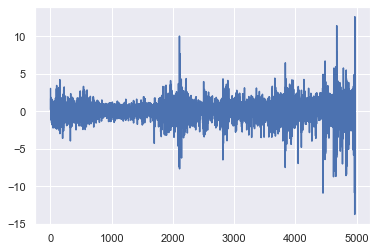

In [25]:
differenced_SPY = (df['SPY']-df['SPY'].shift()).iloc[1:]
differenced_SPY.plot()

<AxesSubplot:>

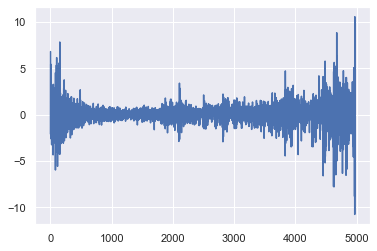

In [26]:
differenced_QQQ = (df['QQQ']-df['QQQ'].shift()).iloc[1:]
differenced_QQQ.plot()

<AxesSubplot:>

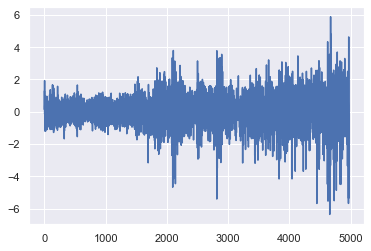

In [27]:
differenced_IWM = (df['IWM']-df['IWM'].shift()).iloc[1:]
differenced_IWM.plot()

## AD Fuller Test

In [28]:
adf_test(differenced_SPY)

Dickey-Fuller Test Result:
Test Statistic                -1.683886e+01
p-value                        1.142343e-29
#Lags Used                     1.600000e+01
Number of Observations Used    4.954000e+03
Critical Value (1%)           -3.431671e+00
Critical Value (5%)           -2.862124e+00
Critical Value (10%)          -2.567081e+00
dtype: float64


In [29]:
adf_spy = adfuller(differenced_SPY)
ad_fuller_pval = adf_spy[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


In [30]:
adf_test(differenced_QQQ)

Dickey-Fuller Test Result:
Test Statistic                -1.263776e+01
p-value                        1.457323e-23
#Lags Used                     3.000000e+01
Number of Observations Used    4.940000e+03
Critical Value (1%)           -3.431674e+00
Critical Value (5%)           -2.862125e+00
Critical Value (10%)          -2.567082e+00
dtype: float64


In [31]:
adf_spy = adfuller(differenced_QQQ)
ad_fuller_pval = adf_spy[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


In [32]:
adf_test(differenced_IWM)

Dickey-Fuller Test Result:
Test Statistic                -1.691899e+01
p-value                        9.973516e-30
#Lags Used                     1.600000e+01
Number of Observations Used    4.954000e+03
Critical Value (1%)           -3.431671e+00
Critical Value (5%)           -2.862124e+00
Critical Value (10%)          -2.567081e+00
dtype: float64


In [33]:
adf_spy = adfuller(differenced_IWM)
ad_fuller_pval = adf_spy[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: TRUE


## KPSS Test

In [34]:
kpss_test(differenced_SPY)

KPSS Test Result:
Test Statistic            0.584476
p-value                   0.024048
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [35]:
kpss_spy = kpss(differenced_SPY)
kpss_pval = kpss_spy[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [36]:
kpss_test(differenced_QQQ)

KPSS Test Result:
Test Statistic            1.124555
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [37]:
kpss_qqq = kpss(differenced_QQQ)
kpss_pval = kpss_qqq[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


In [38]:
kpss_test(differenced_IWM)

KPSS Test Result:
Test Statistic            0.098371
p-value                   0.100000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [39]:
kpss_iwm = kpss(differenced_IWM)
kpss_pval = kpss_iwm[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: TRUE


### 1F - 10 pts Concept: In general, explain how you can get different stationarity results from the two tests. 

- Different stationarity results are possible from the two tests for several reasons. One key is that ADF and KPSS tests are not interchangeable and thus require specific differences for each test. For example in our data, it only had to be differenced once for ADF test to show stationarity, but KPSS test indicates non-stationarity. The difference process will need to be differenced multiple times to become stationary. 

### 1G - 5 pts Concept: What does trend stationary mean?

- If the underlying trend is able to be removed from the data leaving us with a stationary process, then we can call the process as trend stationary. Trend stationary can also be thought of as the data reverting to its mean, which is a characteristic of stationarity. Any 'shocks' will revert the TS back to its trend

## Question 2 Random Walk

### 2A - 5 pts Task: Using random.sample create a sample with length 1000 of 1 if >=0.5 and -1 if less than 0.5

In [40]:
import random

count = 0
countsum = 0

for i in range(0, 1000):
    toss = random.randint(1,100)
    
    if toss>50:
        count = count + 1
    else: 
        count = count - 1
#    print(count)

#countsum = countsum + count
#print(countsum/100)

### 2B - 5 pts Task: Use cumulative sum to create movement

In [41]:
import random
options = [-1,1]
sample_1 = random.choices(options, k = 1000)
print(sample_1)

[-1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1

In [42]:
series = pd.Series(sample_1)
cumulative = series.cumsum()
cumulative

0      -1
1       0
2       1
3       2
4       1
       ..
995    40
996    41
997    42
998    43
999    44
Length: 1000, dtype: int64

### 2C - 5 pts Concept: Describe which of the two series created in 2a and 2b is a random walk, why? What is the other series?

- In my interpretation of 2a and 2b, I would say both processes describe a random walk but only 2b has been coded into a time series. This was mostly due to individual preference, but also limitations in my Python coding skill as well. Conceptually both codes are assigning 1 or -1 to a sample of length 1000, it is just that in one series the cumulative sum is explicit while the other uses the cumsum() function to make the cumulative sum explicit.

### 2D - 5 pts Task: Create two plots of the random walk time series, use .plot() and use autocorrelation_plot()

<AxesSubplot:>

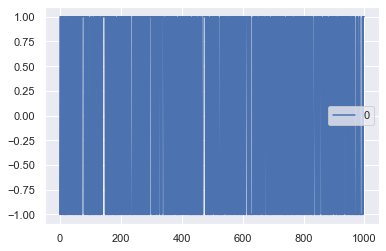

In [43]:
sample_1 = pd.DataFrame(sample_1)
sample_1.plot()

<AxesSubplot:>

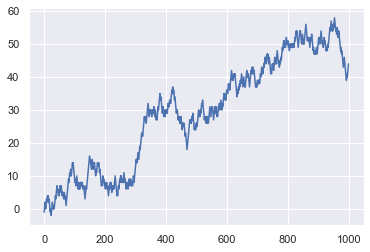

In [44]:
cumulative.plot()

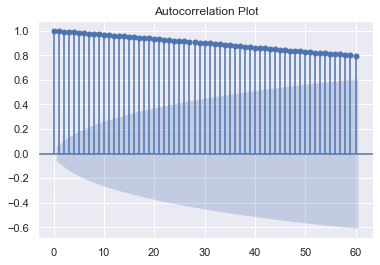

In [45]:
autocorr_plot = plot_acf(cumulative, lags=60, title='Autocorrelation Plot')

### 2E - 10 pts Concept: Is the random walk stationary? Defend using quantitative tests.

- From the first lecture we learn that random walk is a special non-stationary TS. All random walk processes are non-stationary, however note that not all non-stationary time series are random walks. This can be explained in part by the fact that a non-stationary time series does not have a consistent mean and/or variance over time. 
- We defend these concepts by running the ADF and KPSS tests. The results show that stationarity is not found for both quantitative tests.

In [46]:
adf_test(cumulative)

Dickey-Fuller Test Result:
Test Statistic                  -1.583518
p-value                          0.491868
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [47]:
adf_cumulative = adfuller(cumulative)
ad_fuller_pval = adf_cumulative[1]

if ad_fuller_pval <= 0.05:
    print('stationarity from ad_fuller test: TRUE')
else:
    print('stationarity from ad_fuller test: FALSE')

stationarity from ad_fuller test: FALSE


In [48]:
kpss_test(cumulative)

KPSS Test Result:
Test Statistic            4.163644
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [49]:
kpss_cumulative = kpss(cumulative)
kpss_pval = kpss_cumulative[1]

if kpss_pval >= 0.05:
    print('stationarity from kpss_fuller test: TRUE')
else:
    print('stationarity from kpss_fuller test: FALSE')

stationarity from kpss_fuller test: FALSE


### 2F - 5 pts Task: Difference the data and show the autocorrelation plot

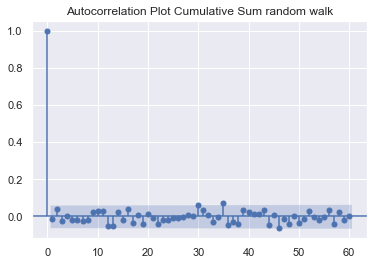

In [50]:
differenced_cumulative = (cumulative - cumulative.shift()).iloc[1:]
autocorr_plot_cumsample = plot_acf(differenced_cumulative, lags=60, title='Autocorrelation Plot Cumulative Sum random walk')

### 2G - 10 pts Concept: What is the significance of this correlation plot?

- For stationarity, the entire distribution of has to be constant over time, not only its mean. And while the mean of the data is indeed constant, e.g., it’s standard deviation isn’t. As t increases, the higher is the standard deviation of the data.

- From another point of view, non-stationarity is tied to special points in time, and here t = 0 is special, since p0 is fixed to 1 here!

- To turn this into a stationary process, you would have to equally allow for all initial conditions. This is impossible because there is no probability distribution which yields every real number with equal likelihood. 

### 2H - 5 pts Concept: Can a random walk be predicted? Why or why not?

- In terms of stocks, Random walk theory suggests that changes in their prices have the same distribution and are independent of each other. As a result, it assumes the past movement or trend of a stock price or market cannot be used to predict its future movement. 
- If this is the case, random walk theory means that stocks take a random and unpredictable path that makes all methods of predicting stock prices futile in the long run.
- To summarize, a random walk is unpredictable; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step.